In [1]:
# import packages

import numpy as np # array (objetos algebraicos)
import pandas as pd # data frame (matriz) y pandar series (vector columna)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set work directory

os.getcwd()
os.listdir()

['Actividad6.md',
 'analisis de sentimiento.ipynb',
 'apache spark.ipynb',
 'Project_forbes.ipynb']

In [4]:
# Identify source
# ERP, bases datos (SQL), ficheros .xlsx o .csv

url = 'https://raw.githubusercontent.com/julihdez36/python/main/dataset/Forbes/Forbes%202000%202021.csv'

In [5]:
# Get data

df = pd.read_csv(url,encoding= 'latin-1',sep=';')

In [6]:
# First exploring

# df.head()
# df.tail()
df.sample(3)

,Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 5/13/21 ($m)
900,901,Legrand,France,"$7,000",$777,"$15,800","$26,700"
1720,1721,Newell Brands,United States,"$9,400",-$770,"$14,700","$11,400"
1278,1279,Logitech International,Switzerland,"$4,400",$925,"$3,800","$19,100"


In [7]:
# Atributos 

print(df.shape) #dimensionalidad
print(df.columns) # campos o variables
print(df.dtypes) # Tipado

(2000, 7)
Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 5/13/21 ($m)'],
      dtype='object')
Rank                                  int64
Company Name                         object
Country                              object
Sales\n($millions)                   object
Profits\n($millions)                 object
Assets\n($millions)                  object
Market Value \nAs of 5/13/21 ($m)    object
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              2000 non-null   int64 
 1   Company Name                      2000 non-null   object
 2   Country                           2000 non-null   object
 3   Sales
($millions)                 2000 non-null   object
 4   Profits
($millions)               2000 non-null   object
 5   Assets
($millions)                2000 non-null   object
 6   Market Value 
As of 5/13/21 ($m)  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


### Cleaning

In [9]:
# Cleaning

df.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
df.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value'],
      dtype='object')

In [10]:
# Cómo accedo a variabels

df.Sales

0       $190,500 
1       $136,200 
2       $245,500 
3       $173,500 
4       $229,700 
          ...    
1995     $13,100 
1996      $5,400 
1997     $13,000 
1998      $3,900 
1999        $841 
Name: Sales, Length: 2000, dtype: object

In [11]:
df[['Company','Sales']].head(3)

,Company,Sales
0,ICBC,"$190,500"
1,JPMorgan Chase,"$136,200"
2,Berkshire Hathaway,"$245,500"


In [12]:
# Vamos a limpiar los datos para que reconozca el tipo de los registros

df.replace(',','',regex= True,inplace= True)
df.replace('\$','',regex= True,inplace= True)
df

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Julian\AppData\Local\Temp\ipykernel_5648\2202802231.py:4: SyntaxWarning: invalid escape sequence '\$'
  df.replace('\$','',regex= True,inplace= True)


,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,ICBC,China,190500,45800,4914700,249500
1,2,JPMorgan Chase,United States,136200,40400,3689300,464800
2,3,Berkshire Hathaway,United States,245500,42500,873700,624400
3,4,China Construction Bank,China,173500,39300,4301700,210400
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229700,49300,510300,1897200
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,13100,-35,12000,3500
1996,1997,Insurance Australia Group,Australia,5400,-212,25000,9300
1997,1998,Sumec Corporation,China,13000,79,7100,1300
1998,1999,Gold Fields,South Africa,3900,718,7500,8900


In [14]:
df.sample(2)

,Rank,Company,Country,Sales,Profits,Assets,Market_value
533,534,FirstRand,South Africa,7800,923,132700,20500
310,311,AT&T,United States,171800,-5200,525800,213800


In [15]:
# Slicing and indexing

df[10:21].Company
df[10:21][['Company','Sales']]

,Company,Sales
10,Samsung Electronics,200700
11,Toyota Motor,249400
12,Alphabet,182400
13,Bank of China,134000
14,Microsoft,153300
15,Citigroup,84400
16,Volkswagen Group,254100
17,Walmart,559200
18,Wells Fargo,85900
19,Verizon Communications,128300


In [21]:
# Cambio de tipado
# Casting (deliberadamente cambie el tipo de datos) o coerción (computado cambia el tipado)

df[['Sales', 'Profits', 'Assets','Market_value']]
df.iloc[:,3:]

,Sales,Profits,Assets,Market_value
0,190500,45800,4914700,249500
1,136200,40400,3689300,464800
2,245500,42500,873700,624400
3,173500,39300,4301700,210400
4,229700,49300,510300,1897200
...,...,...,...,...
1995,13100,-35,12000,3500
1996,5400,-212,25000,9300
1997,13000,79,7100,1300
1998,3900,718,7500,8900


In [25]:
df.iloc[:,3:].astype(float)

ValueError: could not convert string to float: '-'

In [26]:
df.isin(['-']).sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          1
Market_value    0
dtype: int64

In [27]:
df[df.isin(['-'])['Assets']]

,Rank,Company,Country,Sales,Profits,Assets,Market_value
1932,1933,Bank of Greece,Greece,1300,943,-,366


In [28]:
df.Assets.replace('-',float('nan'),inplace=True)   

C:\Users\Julian\AppData\Local\Temp\ipykernel_5648\1148091626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Assets.replace('-',float('nan'),inplace=True)


In [59]:
df.iloc[:,3:] = df.iloc[:,3:].astype(float)


In [36]:
df.isna().sum() # validamos que tenemos datos perdidos

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          1
Market_value    0
dtype: int64

In [37]:
# ¿Qué hacer con datos perdidos?

# Eliminar los datos: el costo de oportunidad es perder información. Es facil. NA < 1%
# parte / todo

100 * df.isna().sum().sum() / len(df)

0.05

In [38]:
# Imputación de datos
# Imputación por media movil

df[df.Country == 'Greece']

,Rank,Company,Country,Sales,Profits,Assets,Market_value
1705,1706,National Bank of Greece,Greece,3300.0,43.0,94800.0,3000.0
1729,1730,Piraeus Bank,Greece,2700.0,-754.0,87600.0,289.0
1735,1736,Alpha Bank,Greece,3600.0,118.0,85700.0,2100.0
1748,1749,Eurobank Ergasias,Greece,3400.0,-1400.0,82900.0,3400.0
1932,1933,Bank of Greece,Greece,1300.0,943.0,NaN,366.0


In [39]:
df.groupby('Country').size()

Country
Argentina                 2
Australia                30
Austria                   9
Bahrain                   1
Bangladesh                1
                       ... 
United Arab Emirates      9
United Kingdom           66
United States           590
Venezuela                 1
Vietnam                   5
Length: 61, dtype: int64

In [40]:
df['Assets'].fillna(df.groupby('Country')['Assets'].transform(lambda x : x.mean()), inplace = True)
df[df.Country == 'Greece']

C:\Users\Julian\AppData\Local\Temp\ipykernel_5648\3421183627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Assets'].fillna(df.groupby('Country')['Assets'].transform(lambda x : x.mean()), inplace = True)
C:\Users\Julian\AppData\Local\Temp\ipykernel_5648\3421183627.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

,Rank,Company,Country,Sales,Profits,Assets,Market_value
1705,1706,National Bank of Greece,Greece,3300.0,43.0,94800.0,3000.0
1729,1730,Piraeus Bank,Greece,2700.0,-754.0,87600.0,289.0
1735,1736,Alpha Bank,Greece,3600.0,118.0,85700.0,2100.0
1748,1749,Eurobank Ergasias,Greece,3400.0,-1400.0,82900.0,3400.0
1932,1933,Bank of Greece,Greece,1300.0,943.0,87750.0,366.0


# Análisis exploratorio de datos [AED]

- Métodos numéricos y tabulares
- Métodos gráficos

In [41]:
# Tablas de frecuencias

df.Country.value_counts().head(10) # frecuencia absoluta: escala lineal

Country
United States     590
China             291
Japan             215
United Kingdom     66
South Korea        62
Hong Kong          59
Canada             56
Germany            54
France             53
India              50
Name: count, dtype: int64

In [42]:
# Normalizar: frecuencias relativas 

df.Country.value_counts(normalize= True).head(10) * 100

Country
United States     29.50
China             14.55
Japan             10.75
United Kingdom     3.30
South Korea        3.10
Hong Kong          2.95
Canada             2.80
Germany            2.70
France             2.65
India              2.50
Name: proportion, dtype: float64

In [55]:
# Frecuencia relativa acumalada

print(df.Country.value_counts(normalize= True).head(5).cumsum().round(1) * 100)

paises = 4/200
empresas = df.Country.value_counts(normalize= True).head(4).sum().round(1) * 100


print(f'\nEl {empresas}% de las 2000 empresas mas importantes del mundo, para la revista forbes, se concentran en {paises}% paises')

Country
United States     30.0
China             40.0
Japan             50.0
United Kingdom    60.0
South Korea       60.0
Name: proportion, dtype: float64

El 60.0% de las 2000 empresas mas importantes del mundo, para la revista forbes, se concentran en 0.02% paises


In [ ]:
# Queremos saber el papel que juega colombia en el rankig

# Qué compañias tenemos

df[df.Country == 'Colombia']

,Rank,Company,Country,Sales,Profits,Assets,Market_value
632,633,Ecopetrol,Colombia,13800,457,40800,26300
814,815,Grupo Aval,Colombia,10300,636,94400,7300
1501,1502,Bancolombia,Colombia,6000,75,74700,8100


In [69]:
# Análisis descriptivo usando métricas básicas

# df.Market_value = df.Market_value.astype(float)


for i in df.iloc[:,3:].columns:
    df[i] = df[i].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Company       2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         2000 non-null   float64
 4   Profits       2000 non-null   float64
 5   Assets        2000 non-null   float64
 6   Market_value  2000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


In [71]:
df.describe().round(2)

,Rank,Sales,Profits,Assets,Market_value
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,19881.08,1268.12,111747.04,39854.92
std,577.49,34400.38,4313.86,346200.55,111703.73
min,1.00,2.00,-22400.00,330.00,34.00
25%,500.75,4500.00,278.75,13200.00,8100.00
50%,1000.50,9800.00,627.00,30300.00,17700.00
75%,1500.25,19600.00,1400.00,73525.00,36800.00
max,2000.00,559200.00,63900.00,4914700.00,2252300.00


$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i$$

In [83]:
edad = pd.Series([10,12,14,13,14,75,72])
edad.mean() # La media es una medidad no robusta (sensible a los datos atípicos o extremos)

30.0

La SD es el promedio de la distancia de mis datos frente a la media

$$sd =  \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2}$$

Coeficiente de variación: desviación estandar normalizada

$$ CV =\frac{s}{\bar{x}}$$

In [86]:
def coef_var(x):
    return 100 * np.std(x) / np.mean(x)

In [87]:
coef_var(df.Assets)

309.72990565763456

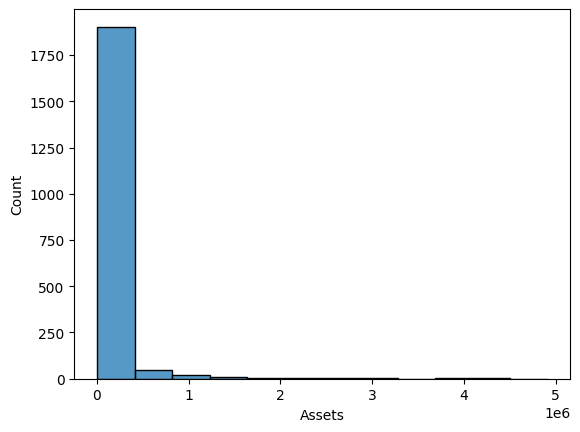

In [90]:
sns.histplot(data = df, x = 'Assets', bins= 'sturges')
plt.show()